In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df['Is_Man'] = df.Gender.astype('category').cat.codes

In [51]:
df.sample(5)

,Gender,Height,Weight,Is_Man
9654,Female,156.949440,61.522257,0
684,Male,173.425578,88.536591,1
8955,Female,156.657195,56.278132,0
4416,Male,182.398113,92.202130,1
4089,Male,172.909829,84.973719,1


In [37]:
#df = df.rename(index=str, columns={"Height (cm)": "Height", "Weight (kg)": "Weight"})

In [42]:
# df = df.drop(['Unnamed: 0'], axis=1)

In [44]:
# df.to_csv('dataset.csv', index=False)

In [47]:
df.shape

(10000, 3)

In [48]:
df.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

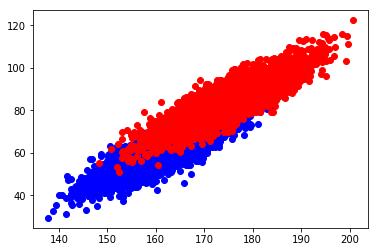

In [52]:
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');

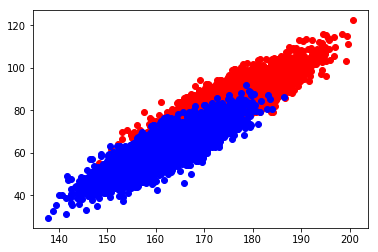

In [53]:
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');

# Задача восстановления регрессии
### LinearRegression

In [12]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score

In [15]:
lr = linear_model.LinearRegression()

In [59]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Height', 'Is_Man']], df.Weight, test_size=0.33, random_state=40)

In [157]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
X_test.head()

,Height,Is_Man
293,177.543978,1
1244,175.464666,1
7353,162.396670,0
5145,158.876608,0
1618,189.569921,1


In [159]:
y_test.head()

293     86.823057
1244    80.084455
7353    64.858104
5145    53.933542
1618    96.646413
Name: Weight, dtype: float64

In [160]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([ 87.25400149,  85.00971339,  62.30384278,  58.5044925 ,
       100.23410519])

# [mean_squared_error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
![mse](http://scikit-learn.org/stable/_images/math/44f36557fef9b30b077b21550490a1b9a0ade154.png)

In [113]:
from sklearn.metrics import mean_squared_error
y_true_example = [3, -0.5, 2, 7]
y_pred_example = [2, 2.0, 2, 10]
mean_squared_error(y_true_example, y_pred_example)

4.0625

In [114]:
mean_squared_error(y_test, y_pred)

20.76520969799837

# [mean_absolute_error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)
![mae](http://scikit-learn.org/stable/_images/math/c38d771fb5eb121916c06cf8c651363583d17794.png)

In [115]:
from sklearn.metrics import mean_absolute_error
y_true_example = [3, -0.5, 2, 7]
y_pred_example = [2, 2.0, 2, 10]
mean_absolute_error(y_true_example, y_pred_example)

1.625

# Кросс-валидация
![cv](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

In [130]:
#TODO чем наш случай отличается от картинки?

In [129]:
cross_val_score(lr, df[['Height', 'Is_Man']], df.Weight, cv=5, scoring='neg_mean_absolute_error')

array([-3.69029408, -3.59227623, -3.60308406, -3.6340899 , -3.61107456])

# Возьмём 1 признак - пол

In [164]:
lr.fit(X_train[['Is_Man']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
X_test.head()

,Height,Is_Man
293,177.543978,1
1244,175.464666,1
7353,162.396670,0
5145,158.876608,0
1618,189.569921,1


In [166]:
y_pred = lr.predict(X_test[['Is_Man']])
y_pred[0:5]

array([84.85850861, 84.85850861, 61.63365922, 61.63365922, 84.85850861])

In [167]:
lr.intercept_

61.633659219269504

In [168]:
lr.coef_

array([23.22484939])

## Weight = -61.63 + Is_Man * 23.22

In [169]:
df[df.Is_Man == 1].Weight.mean()

84.83105736556595

In [170]:
df[df.Is_Man == 0].Weight.mean()

61.625051307465824

In [171]:
mean_absolute_error(y_test, y_pred)

6.926940980051769

In [172]:
cross_val_score(lr, df[['Is_Man']], df.Weight, cv=5, scoring='neg_mean_absolute_error')

array([-7.22482828, -7.06704322, -7.07256981, -6.97230015, -6.78085856])

# Возьмём 1 признак - рост

In [189]:
lr.fit(X_train[['Height']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
X_test.head()

,Height,Is_Man
293,177.543978,1
1244,175.464666,1
7353,162.396670,0
5145,158.876608,0
1618,189.569921,1


In [184]:
y_pred = lr.predict(X_test[['Height']])
y_pred[0:5]

array([ 85.73428967,  82.8527772 ,  64.7431339 ,  59.86502792,
       102.39985531])

In [185]:
mean_absolute_error(y_test, y_pred)

4.478818076609361

In [186]:
lr.intercept_

-160.3063530642853

In [187]:
lr.coef_

array([1.38580112])

## Weight = -160.306 + Heigth * 1.386

In [183]:
cross_val_score(lr, df[['Height']], df.Weight, cv=5, scoring='neg_mean_absolute_error')

array([-4.73183348, -4.64844082, -4.37668787, -4.73241421, -4.55759028])

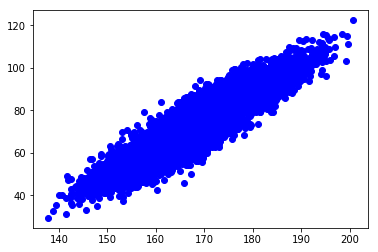

In [192]:
plt.plot(df.iloc[:,1], df.iloc[:,2], 'bo');

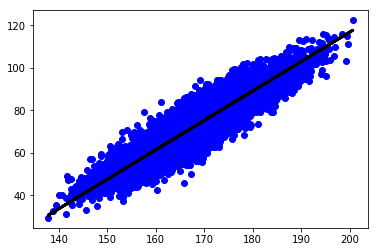

In [191]:
plt.plot(df.iloc[:,1], df.iloc[:,2], 'bo');
plt.plot(df[['Height']], lr.predict(df[['Height']]), color='black', linewidth=3)

# Возьмём 2 признака - рост и пол

In [194]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
X_test.head()

,Height,Is_Man
293,177.543978,1
1244,175.464666,1
7353,162.396670,0
5145,158.876608,0
1618,189.569921,1


In [196]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([ 87.25400149,  85.00971339,  62.30384278,  58.5044925 ,
       100.23410519])

In [197]:
mean_absolute_error(y_test, y_pred)

3.6150503899159734

In [198]:
lr.intercept_

-112.97767730403046

In [199]:
lr.coef_

array([1.07934183, 8.60103594])

## Weight = -112.98 + Heigth \* 1.079 + Is_Man \* 8.6

таким образом, мы получили формулу описывающую природу, с помощью алгоритма машинного обучения

In [202]:
cross_val_score(lr, df[['Height', 'Is_Man']], df.Weight, cv=5, scoring='neg_mean_absolute_error')

array([-3.69029408, -3.59227623, -3.60308406, -3.6340899 , -3.61107456])

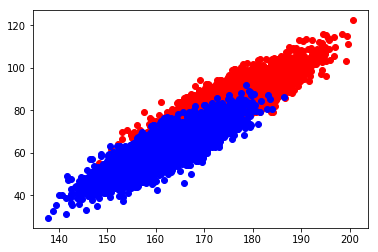

In [207]:
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');

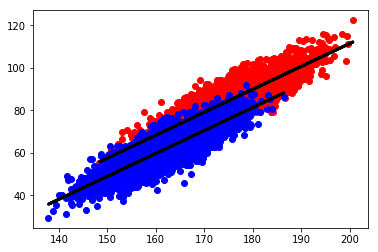

In [206]:
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');

plt.plot(df[df.Gender == 'Male'][['Height']], lr.predict(df[df.Gender == 'Male'][['Height','Is_Man']]), color='black', linewidth=3);
plt.plot(df[df.Gender == 'Female'][['Height']], lr.predict(df[df.Gender == 'Female'][['Height','Is_Man']]), color='black', linewidth=3);

# Задача классификации

### DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier()

In [23]:
cross_val_score(dtc, df.iloc[:,1:3], df.Gender, cv=2)

array([0.8756, 0.8676])

In [24]:
dtc.fit(df.iloc[:,1:3], df.Gender)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
dtc.predict([[180,90]])

array(['Male'], dtype=object)

In [26]:
dtc.predict([[160,40]])

array(['Female'], dtype=object)

In [27]:
from sklearn import tree

In [28]:
dtcsmall = DecisionTreeClassifier(max_depth=3)

In [29]:
cvscore = cross_val_score(dtcsmall, df.iloc[:,1:3], df.Gender, cv=10)
print (cvscore)
cvscore.mean()

[0.93  0.895 0.927 0.909 0.903 0.904 0.91  0.916 0.918 0.918]


0.9129999999999999

In [16]:
dtcsmall.fit(df.iloc[:,1:3], df.Gender)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
tree.export_graphviz(dtcsmall, out_file='dtcsmall.dot',
                    feature_names=df.columns[1:3],
                    class_names=['Female', 'Male'],
                    filled=True,
                    rounded=True,
                     special_characters=True
                    )
!dot -Tpng dtcsmall.dot -o dtcsmall.png
!dtcsmall.png

![dtc](dtcsmall.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/300px-RMS_Titanic_3.jpg)

https://www.kaggle.com/c/titanic

- **sex** пол 0 ж 1 м
- **pclass** Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **fare** Passenger fare
- **sibsp** количество братьев сестер 

![](https://redislabs.com/wp-content/uploads/2017/09/sample_tree.png)


accuracy = 0.7703

In [33]:
dtc6 = DecisionTreeClassifier(max_depth=6)
cvscore = cross_val_score(dtc6, df.iloc[:,1:3], df.Gender, cv=10)
print (cvscore)
cvscore.mean()

[0.932 0.882 0.931 0.919 0.897 0.905 0.914 0.916 0.919 0.918]


0.9132999999999999

Стало чуть лучше

In [34]:
dtc6.fit(df.iloc[:,1:3], df.Gender)
tree.export_graphviz(dtc6, out_file='dtc6.dot',
                    feature_names=df.columns[1:3],
                    class_names=['Female', 'Male'],
                    filled=True,
                    rounded=True,
                     special_characters=True
                    )
!dot -Tpng dtc6.dot -o dtc6.png
!dtc6.png

In [26]:
dtc15 = DecisionTreeClassifier(max_depth=15)

In [30]:
cvscore = cross_val_score(dtc15, df.iloc[:,1:3], df.Gender, cv=10)
print (cvscore)
cvscore.mean()

[0.898 0.843 0.896 0.882 0.871 0.877 0.888 0.889 0.898 0.874]


0.8816

Переобучение

In [32]:
dtc15.fit(df.iloc[:,1:3], df.Gender)
tree.export_graphviz(dtc15, out_file='dtc15.dot',
                    feature_names=df.columns[1:3],
                    class_names=['Female', 'Male'],
                    filled=True,
                    rounded=True,
                     special_characters=True
                    )
!dot -Tpng dtc15.dot -o dtc15.png
!dtc15.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.77935 to fit


# Подбор параметров обучения

In [10]:
from sklearn.model_selection import GridSearchCV

tree_para = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

In [11]:
tree_grid.fit(df.iloc[:,1:3], df.Gender)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
tree_grid.cv_results_['mean_test_score']

array([0.9081, 0.9133, 0.9171, 0.9173, 0.9125, 0.9071, 0.9071, 0.9021,
       0.9002, 0.8936, 0.8907, 0.8821, 0.8741, 0.8747, 0.8744, 0.8736,
       0.8729, 0.8745, 0.8734, 0.8731])

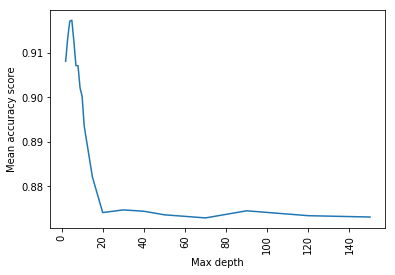

In [32]:
plt.plot([x['max_depth'] for x in tree_grid.cv_results_['params']], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean accuracy score')
plt.xticks(rotation='vertical');

# Кластеризация
### KMeans

In [1]:
from sklearn.cluster import KMeans

In [9]:
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(df[['Height', 'Weight']])

In [10]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [16]:
df['KMeans_predict'] = y_pred

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_pred, df.Is_Man)

0.8926

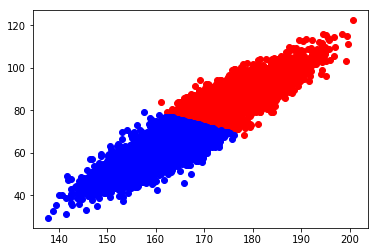

In [19]:
plt.plot(df[df.KMeans_predict == 1].iloc[:,1], df[df.KMeans_predict == 1].iloc[:,2], 'ro');
plt.plot(df[df.KMeans_predict == 0].iloc[:,1], df[df.KMeans_predict == 0].iloc[:,2], 'bo');

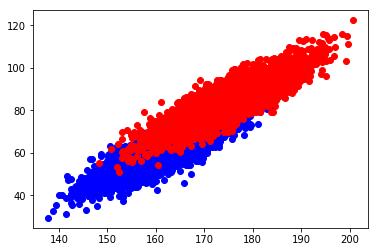

In [20]:
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');